<a href="https://colab.research.google.com/github/Iman6243/AI/blob/main/PREDICTION(Khorasani_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from numpy.linalg import inv
from sklearn.linear_model import LinearRegression
from numpy import array
from scipy.stats import pearsonr


In [2]:
data=pd.read_csv("Data_Injury_Prevention.csv")
data.head(2)

,ID,Age,Height,Mass,Team,Position,Years of Football Experience,"Previous Injuries (1=yes, 0=no)",Number of Injuries,"Ankle Injuries (1= yes, 0=no)",...,Importance Injury Prevention,"Knowledgeability (1=yes, 2=no)","Prevention Measure Stretching (1=yes, 0=no)","Prevention Measure Warm Up (1=yes, 0=no)","Prevention Measure Specific Strength Exercises (1=yes, 0=no)","Prevention Measure Bracing (1=yes, 0=no)","Prevention Measure Taping (1=yes, 0=no)","Prevention Measure Shoe Insoles (1=yes, 0=no)","Prevention Measure Face Masks (1=yes, 0=no)","Prevention Measure Medical Corset (1=yes, 0=no)"
0,146.0,19.0,173.0,67.6,1.0,3.0,1.0,1.0,6.0,1.0,...,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,155.0,22.0,179.5,71.0,1.0,3.0,1.0,1.0,2.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data.tail(4)

,ID,Age,Height,Mass,Team,Position,Years of Football Experience,"Previous Injuries (1=yes, 0=no)",Number of Injuries,"Ankle Injuries (1= yes, 0=no)",...,Importance Injury Prevention,"Knowledgeability (1=yes, 2=no)","Prevention Measure Stretching (1=yes, 0=no)","Prevention Measure Warm Up (1=yes, 0=no)","Prevention Measure Specific Strength Exercises (1=yes, 0=no)","Prevention Measure Bracing (1=yes, 0=no)","Prevention Measure Taping (1=yes, 0=no)","Prevention Measure Shoe Insoles (1=yes, 0=no)","Prevention Measure Face Masks (1=yes, 0=no)","Prevention Measure Medical Corset (1=yes, 0=no)"
135,78.0,14.0,177.0,68.0,6.0,3.0,0.0,1.0,2.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
136,80.0,14.0,169.0,52.0,6.0,2.0,0.0,1.0,2.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
137,36.0,13.0,153.0,44.3,6.0,2.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
138,37.0,13.0,161.0,48.6,6.0,3.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data=data.rename(columns={'Risk Factor Fatigue (1=yes, 0=no)': 'Fatigue', 'Previous Injuries (1=yes, 0=no)': 'Previous Injuries', 'Ankle Injuries (1= yes, 0=no)': 'Ankle Injuries'})
data.head(2)

,ID,Age,Height,Mass,Team,Position,Years of Football Experience,Previous Injuries,Number of Injuries,Ankle Injuries,...,Importance Injury Prevention,"Knowledgeability (1=yes, 2=no)","Prevention Measure Stretching (1=yes, 0=no)","Prevention Measure Warm Up (1=yes, 0=no)","Prevention Measure Specific Strength Exercises (1=yes, 0=no)","Prevention Measure Bracing (1=yes, 0=no)","Prevention Measure Taping (1=yes, 0=no)","Prevention Measure Shoe Insoles (1=yes, 0=no)","Prevention Measure Face Masks (1=yes, 0=no)","Prevention Measure Medical Corset (1=yes, 0=no)"
0,146.0,19.0,173.0,67.6,1.0,3.0,1.0,1.0,6.0,1.0,...,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,155.0,22.0,179.5,71.0,1.0,3.0,1.0,1.0,2.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
X= data['Fatigue']
X
Y= data['Number of Injuries']
Y
n=len(Y)
n

X_bar = np.mean(X)
X_bar
Y_bar = np.mean(Y)
Y_bar
n*X_bar*Y_bar

numerator = np.sum(X  * Y )- n*X_bar*Y_bar
denominator = np.sum(X**2)- n*X_bar**2

#denominator = np.sum(X**2) - n*(X_mean)**2
beta_hat_1 = numerator / denominator
beta_hat_0= Y_bar - beta_hat_1 * X_bar
print("the regression equation is:   \n   ", "Y=",beta_hat_0, "+", beta_hat_1,"*X" )
print("the regression equation  between Fatigue and Number of Injuries is:   \n   ", "Number of Injuries=",beta_hat_0, "+", beta_hat_1,"*Fatigue" )
print("the  predicted value of y if x=1 is:   \n   ", "y_hat=",beta_hat_0+beta_hat_1*1 )


the regression equation is:   
    Y= 1.5930232558139534 + 0.8220710838086881 *X
the regression equation  between Fatigue and Number of Injuries is:   
    Number of Injuries= 1.5930232558139534 + 0.8220710838086881 *Fatigue
the  predicted value of y if x=1 is:   
    y_hat= 2.4150943396226414


In [31]:
df=pd.DataFrame(data)
df.head(2)
df = df.rename(columns={0: 'X', 1: 'Y'}) # you may need inplace=True

x = df[['Fatigue']] #PREDICTOR
y =df['Number of Injuries'] # DEPENDENT
reg_model = LinearRegression()
reg_model.fit(x, y)

beta_hat_1 = reg_model.coef_
beta_hat_0 = reg_model.intercept_

print("the regression equation is:      ", "Number of Injuries=",beta_hat_0, "+", beta_hat_1[0],"*Fatigue" )

print("the  predicted value of y if x=1 is:   \n   ", "y_hat=",beta_hat_0+beta_hat_1*1 )


the  predicted value of y if x=1 is:   
    y_hat= [2.41509434]


In [32]:
features = ['Fatigue', 'Previous Injuries', 'Number of Injuries','Ankle Injuries']
data= data[features]
X= data['Fatigue']
#X1= data['Previous Injuries']
Y= data['Number of Injuries']

#X= X.reshape((len(X), 1))
X = X.values.reshape((len(data), 1))
X.shape

X= np.hstack((np.ones((X.shape[0], 1)), X))
X.shape

B=inv(X.T.dot(X)).dot(X.T).dot(Y)
print(B)

print("the regression equation is:      ", "Y=", B[0], "+", B[1], "*X")
print("the  predicted value of score  y if x=1 is:   \n   ", "y_hat=",B[0]+B[1]*1 )

[1.59302326 0.82207108]
the regression equation is:       Y= 1.5930232558139539 + 0.8220710838086875 *X
the  predicted value of score  y if x=1 is:   
    y_hat= 2.4150943396226414


In [33]:
yhat = X.dot(B)
y
corr = pearsonr(yhat, y)
print("the Pearson's correlation between two variables is:     ", corr)

the Pearson's correlation between two variables is:      PearsonRResult(statistic=0.24818075727776823, pvalue=0.0032210260635913376)


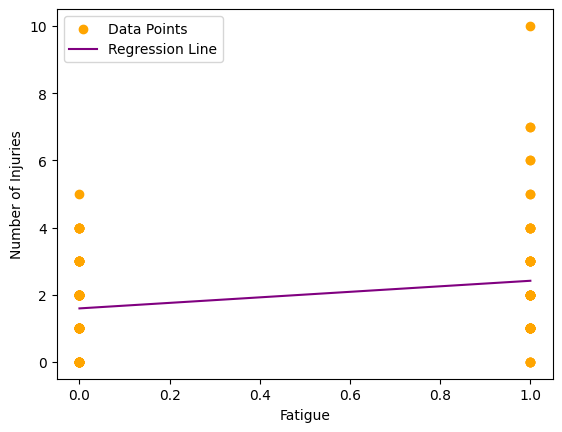

In [34]:
plt.scatter(data['Fatigue'], data['Number of Injuries'], color='orange', label='Data Points')
plt.plot(data['Fatigue'], yhat, color='purple', label='Regression Line')
plt.xlabel('Fatigue')
plt.ylabel('Number of Injuries')
plt.legend()
plt.show()

In [35]:
corr = pearsonr(yhat, y)
corr

PearsonRResult(statistic=0.24818075727776823, pvalue=0.0032210260635913376)

In [46]:
features = ['Fatigue', 'Previous Injuries', 'Number of Injuries','Ankle Injuries']
data1= data[features]

# تبدیل DataFrame به آرایه‌ی Numpy
np_array = data1.values

X, Y = np_array[:,0:2], np_array[:,2]
X = np.hstack((np.ones((X.shape[0], 1)), X))
X.shape

B = inv(X.T.dot(X)).dot(X.T).dot(Y)
print(B)

print("the regression equation is:\n      ", "Number of Injuries=",B[0], "+", B[1],"*Fatigue",'+', B[2], "*Previous Injuries")

yhat = X.dot(B)
plt.scatter(y, yhat)
corr = pearsonr(yhat, Y)
print("the Pearson's correlation between two variables is:\n     ", corr)


(139, 3)

In [50]:
X_new=array([0.45,3])
X_new1 = np.hstack((np.ones(1), X_new))

y_hat_new=X_new1.dot(B)
y_hat_new
y_new=0.6
error_in_prediction=y_new-y_hat_new
print("the  predicted value of y if x=[0.45,3] is:   \n   ", "y_hat=",y_hat_new)



the  predicted value of y if x=[0.45,3] is:   
    y_hat= 6.557567785826152


In [51]:
features = ['Fatigue', 'Previous Injuries', 'Number of Injuries','Ankle Injuries']
data2= data[features]

x = data2[['Fatigue', 'Previous Injuries']] #PREDICTOR
y =data2['Ankle Injuries']# DEPENDENT

reg_model = LinearRegression()
reg_model.fit(x, y)

beta_hat1 = reg_model.coef_
alpha_hat1 = reg_model.intercept_

print("the regression equation is:\n     ", "y=",alpha_hat1, "+", beta_hat1[0],"* x1 +",beta_hat1[1],"* x2" )


the regression equation is:
      y= 0.10385669537979653 + -0.0712118245888801 * x1 + 0.5157106499608456 * x2


In [52]:
data_new = array([
  [0.05, 6, 0.02],
  [0.11, 4,  0.5],
  [0.45, 8,  0.05]])

x_new=data_new[:,0:2]
y_new=data_new[:,2]

y_hat=reg_model.predict(x_new)
ss_test=np.sum((y_new-y_hat)**2)
print("""The SS Error between two variables is: """, ss_test)

corr = pearsonr(y_hat, y_new)
print("""The Pearson's correlation between two variables is: """, corr)

The SS Error between two variables is:  30.03139543758376
The Pearson's correlation between two variables is:  PearsonRResult(statistic=-0.841827281593178, pvalue=0.3629601994575736)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [53]:
real_data = pd.read_csv("Data_Injury_Prevention.csv")
real_data.shape

real_data=data.rename(columns={'Risk Factor Fatigue (1=yes, 0=no)': 'Fatigue', 'Previous Injuries (1=yes, 0=no)': 'Previous Injuries', 'Ankle Injuries (1= yes, 0=no)': 'Ankle Injuries'})
real_data.head()


,Fatigue,Previous Injuries,Number of Injuries,Ankle Injuries
0,1.0,1.0,6.0,1.0
1,0.0,1.0,2.0,0.0
2,1.0,1.0,7.0,1.0
3,1.0,1.0,1.0,0.0
4,0.0,1.0,2.0,1.0


In [54]:
features = ['Fatigue', 'Previous Injuries', 'Number of Injuries','Ankle Injuries']
x = real_data[['Fatigue', 'Previous Injuries', 'Number of Injuries']] #PREDICTOR
y =real_data['Ankle Injuries']# DEPENDENT


reg_model = LinearRegression()
reg_model.fit(x, y)

beta_hat_1 = reg_model.coef_
beta_hat_0 = reg_model.intercept_

In [56]:
from numpy import array
real_data_new = array([
	[36, 60, 6, 19],
	[45,70,5,26]])

x_new=real_data_new[:,0:3]
y_new=real_data_new[:,3]

y_hat=reg_model.predict(x_new)
y_hat

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.4943412 , 7.97479569])

In [59]:
#sakht matrix jadid
x.shape
x_train= x[0:98]
x_train.shape
y_train =y[0:98]

x_test= x[98:139]
y_test =y[98:139]
x.shape
x_train.shape
x_test.shape
98/139

#taarif fanction
reg_model = LinearRegression()
reg_model.fit(x_train, y_train)
#mitunid anjam nadi
beta_hat_1_train = reg_model.coef_
beta_hat_0_train  = reg_model.intercept_
#pishbini ruye X_test
y_hat=reg_model.predict(x_test)

print(f"Sum Squar Error ={sum((y_hat-y_test)**2)}")


Sum Squar Error =8.210045923605769


In [61]:
#kare spilit mirixe beham  dade ha ra
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


#dar enteha goftim text size 30 darsad begire va be 4 group taghsim
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
#tarif regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
#in ha ham niyaz nist
beta_hat_1_train = reg_model.coef_
beta_hat_0_train = reg_model.intercept_

y_hat = reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.15455802376754116


In [63]:
#real_data = pd.read_csv("data_bmi.csv")

features = ['Fatigue', 'Previous Injuries', 'Number of Injuries','Ankle Injuries']
x = real_data[['Fatigue', 'Previous Injuries', 'Number of Injuries']] #PREDICTOR
y =real_data['Ankle Injuries']# DEPENDENT

#data 17 ast ama man gul zadam ta taghsim bandi rahat bashe
x=x[0:138]
y=y[0:138]
n_folds = 6
fold_size = len(y) // n_folds
#chon 5 bar mse migirim yak khali migirim k hame dakhelesh berizim
mse_list = []
#i=6
for i in range(n_folds):
    x_test = x[i * fold_size: (i + 1) * fold_size]
    y_test = y[i * fold_size: (i + 1) * fold_size]

    x_train = np.delete(x, np.arange(i * fold_size, (i + 1) * fold_size), axis=0)
    y_train = np.delete(y, np.arange(i * fold_size, (i + 1) * fold_size), axis=0)

    reg_model = LinearRegression()
    reg_model.fit(x_train, y_train)
    y_hat = reg_model.predict(x_test)
    mse = sum((y_hat - y_test) ** 2) / len(y_test)
    mse_list.append(mse)

avg_mse = np.mean(mse_list)
print(f"Averge of Mean Squar Error : {avg_mse}")


Averge of Mean Squar Error : 0.1892459533316173


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature name

In [64]:
#real_data = pd.read_csv("data_bmi.csv")

#features = ['Fatigue', 'Previous Injuries', 'Number of Injuries','Ankle Injuries']
#x = real_data[['Fatigue', 'Previous Injuries', 'Number of Injuries']] #PREDICTOR
#y = real_data['Ankle Injuries']# DEPENDENT

n_folds = 6
fold_size = len(y) // n_folds

mse_list = []
for i in range(n_folds):
  #baraye inke be 18 narese az i estefade kardim chon 18 nadarim kolan
    x_test = x[i * fold_size: min((i + 1) * fold_size, x.shape[0])]
    y_test = y[i * fold_size: min((i + 1) * fold_size, y.shape[0])]

    x_train = np.delete(x, np.arange(i * fold_size, min((i + 1) * fold_size, x.shape[0])), axis=0)
    y_train = np.delete(y, np.arange(i * fold_size, min((i + 1) * fold_size, y.shape[0])), axis=0)

    reg_model = LinearRegression()
    reg_model.fit(x_train, y_train)
    y_hat = reg_model.predict(x_test)
    mse = sum((y_hat - y_test) ** 2) / len(y_test)
    mse_list.append(mse)

avg_mse = np.mean(mse_list)
print(f"Averge of Mean Squar Error : {avg_mse}")


Averge of Mean Squar Error : 0.1892459533316173


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature name

In [65]:
from sklearn.model_selection import KFold


features = ['Fatigue', 'Previous Injuries', 'Number of Injuries','Ankle Injuries']
x =real_data[['Fatigue', 'Previous Injuries', 'Number of Injuries']] #PREDICTOR
y =real_data['Ankle Injuries']# DEPENDENT
#tamame un i haei k bala anjam midadim in bedun esbat anjam mide
#kfold ba asase index mide
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_list = []

for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

average_mse = np.mean(mse_list)
print(f"Averge of Mean Squar Error : {average_mse}")


ss_list=[]
ss_list.append(2)

Averge of Mean Squar Error : 0.1892459533316173


In [67]:
x = real_data[['Fatigue',  'Previous Injuries']]
y = real_data['Ankle Injuries']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_list = []

for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

average_mse2 = np.mean(mse_list)
print(f"Averge of Mean Squar Error : {average_mse2}")

Averge of Mean Squar Error : 0.22250686090436736
